The dataset *penguins* contains a study of the penguin species that inhabit different islands of Antarctica. <br>

Focusing on the **grouping/clustering** approach, researchers have a few questions about penguins:
- Can we distinguish the sex of the animals from the rest of the data?
- Is the island decisive when it comes to the physical development of penguins?
- Are we able to distinguish penguins from one island or another?
- Could we identify the species and island with physiological data?


To answer these questions and more, it is necessary to do an **exploratory analysis** of the data provided in the dataset and process it in order to obtain answers and extract enough knowledge to make decisions.

In [ ]:
# Load libraries
import seaborn as sns
import pandas as pd

## Load data with pandas

In [4]:
#Create a data frame from the file separated by ","
penguins = pd.read_csv('penguins_antarctica.csv', sep=',')  
#penguins = sns.load_dataset("penguins")

print("Tipo de variable: ", type(penguins))

Tipo de variable:  <class 'pandas.core.frame.DataFrame'>


Our *penguins* variable contains the data and is already structured in **pandas** format so it will not need to be converted and it will be much easier to perform the exploration. (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) 

### Review data (name and type of the columns, first row, last rows, first 5 rows, random sample of 5 rows...)

In [5]:
# Cantidad de registros originales utilizando la función len() y .shape 
print("Number of registers: ", len(penguins))
print("Dataset size: ", penguins.shape)

Number of registers:  344
Dataset size:  (344, 7)


In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

We observe 7 different columns, which will be the **variables** that describe each penguin, represented by each row, also called **record/sample**. <br>
Of the columns, we can see that there are 3 of them with information in **text format** and the rest are numeric with decimals. The first will need additional processing to use them in algorithms (they only understand digits).


In [8]:
#iloc is to access the data frame by position
penguins.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       Male
Name: 0, dtype: object

In [2]:
# penguins.iloc[-1]

In [10]:
#First 5 rows
penguins.iloc[0:5]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
#First 5 rows
penguins.head(5)

In [ ]:
#Last 5 rows
penguins.tail(5)

In [ ]:
#Random sample of 5 rows
penguins.sample(5)

In [11]:
#We can access to one or several columns
penguins.iloc[0:5]['island']

0    Torgersen
1    Torgersen
2    Torgersen
3    Torgersen
4    Torgersen
Name: island, dtype: object

In [12]:
penguins.iloc[0:5].island

0    Torgersen
1    Torgersen
2    Torgersen
3    Torgersen
4    Torgersen
Name: island, dtype: object

In [13]:
penguins.iloc[0:5][['species','sex']]

,species,sex
0,Adelie,Male
1,Adelie,Female
2,Adelie,Female
3,Adelie,NaN
4,Adelie,Female


In [ ]:
#loc is to access the data frame by index
penguins.loc[0]

In [14]:
#-1 index does not exist
penguins.loc[-1]

KeyError: ignored

In [15]:
#Check indexes
penguins.index

RangeIndex(start=0, stop=344, step=1)

## Description of data with pandas

### Numerical attributes

In [16]:
#Pandas allows to make several calculations on columns
penguins['flipper_length_mm'].mean()

200.91520467836258

In [17]:
penguins['flipper_length_mm'].std()

14.061713679356888

In [18]:
penguins['flipper_length_mm'].max()

231.0

In [19]:
penguins['flipper_length_mm'].min()

172.0

In [ ]:
#Filtering by condition
penguins[penguins['sex']=='Male']['flipper_length_mm'].min()

In [20]:
#Some descriptive statistics of each attribute
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:ylabel='Frequency'>

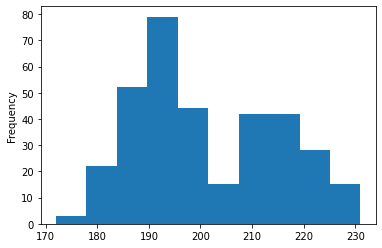

In [21]:
#Histogram of numerical attribute flipper_length_mm
penguins['flipper_length_mm'].plot.hist(bins=10)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

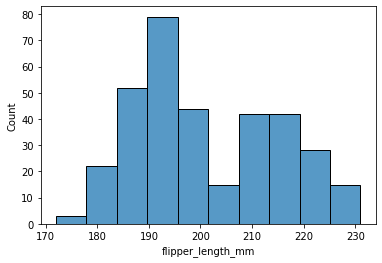

In [22]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=10)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

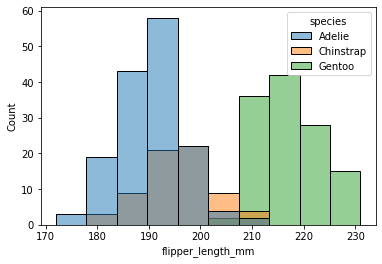

In [23]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

### Categorical attributes

In [24]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [25]:
#Equivalent to
set(penguins['species'])

{'Adelie', 'Chinstrap', 'Gentoo'}

In [26]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [27]:
penguins['sex'].unique()

array(['Male', 'Female', nan], dtype=object)

It is also observed how some record has **nan/null** values, so in general terms we will need to **clean** the data set to avoid records with this type of associated values.

Let's start with cleaning!

In [28]:
# We evaluate how many records have null values per variable
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

There are few samples with null values, so a priori, if we eliminate them we will not have problems. Few samples do not affect the representativeness of the data.

In [29]:
# We remove null records with the .dropna() function
penguins_clean = penguins.dropna()

# We ensure how many final samples we have
print("Number of registers without nulls: ", len(penguins_clean))

Number of registers without nulls:  333


In [30]:
# We start to analyze the data. First step: Is there the same ratio of both sexes?
print(penguins_clean.sex.value_counts())

Male      168
Female    165
Name: sex, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

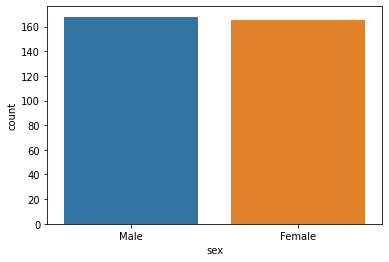

In [31]:
sns.countplot(penguins_clean['sex'])

It seems that globally, there is practically the same proportion, so it is a good start when it comes to avoiding problems with the algorithms.

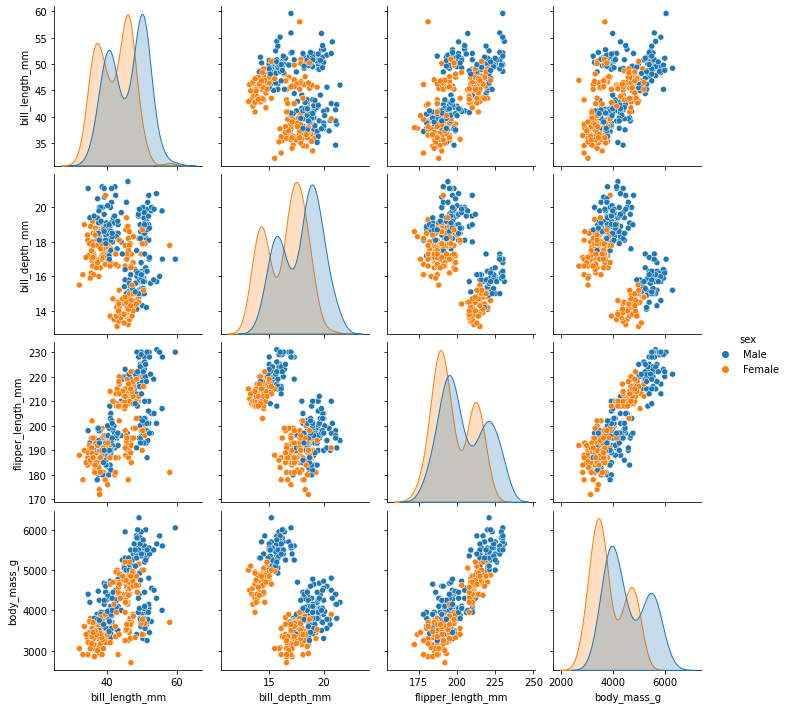

In [32]:
# Second step: Are the variables that describe both sexes differentiable?
sns.pairplot(data = penguins_clean, hue = "sex")

The features of the penguins (described by the numerical variables) do not seem to have much difference between them a priori. Observing the distributions (diagonals) it seems that we are dealing with a **binomial distribution** and in the graph of the variables it does not seem that they are very separable between them. <br><br>
Still, it seems that a couple of variables can help distinguish between the sexes of penguins. <br>
For example, the variables *body_mass_g* (vertical axis) and *bill_depth_mm* (horizontal axis) form 2 very separate nuclei where, in turn, it seems that the sex of the penguin is quite separable.
<br><br>
The next step to continue analyzing will consist of using the non-numeric variables (island & species) to see if working with subgroups, we can extract more information.

In [33]:
# How many islands are there and how are the penguins distributed?
penguins_clean.groupby(["sex", "island", "species"]).count()["body_mass_g"]

sex     island     species  
Female  Biscoe     Adelie       22
                   Gentoo       58
        Dream      Adelie       27
                   Chinstrap    34
        Torgersen  Adelie       24
Male    Biscoe     Adelie       22
                   Gentoo       61
        Dream      Adelie       28
                   Chinstrap    34
        Torgersen  Adelie       23
Name: body_mass_g, dtype: int64

We observe how they are distributed first by sex, island and finally by species. Paying attention, you can see how there is no island where the 3 penguin species cohabit and therefore it will make it difficult for us to identify the animals.


To simplify the current problem, we will address the question by segmenting it: Are we able to distinguish the sex of the *Adelie* species in individuals from the same island? Will they have different characteristics between the different islands?

The reason for using the *Adelie* species is simple: it is the only one that inhabits the 3 islands.

In [37]:
# We are going to select only the Adelie species
penguins_adelie = penguins_clean[penguins_clean.species == "Adelie"]
print("Penguins from Adelie specie: ", len(penguins_adelie))
penguins_adelie.head()

Penguins from Adelie specie:  146


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


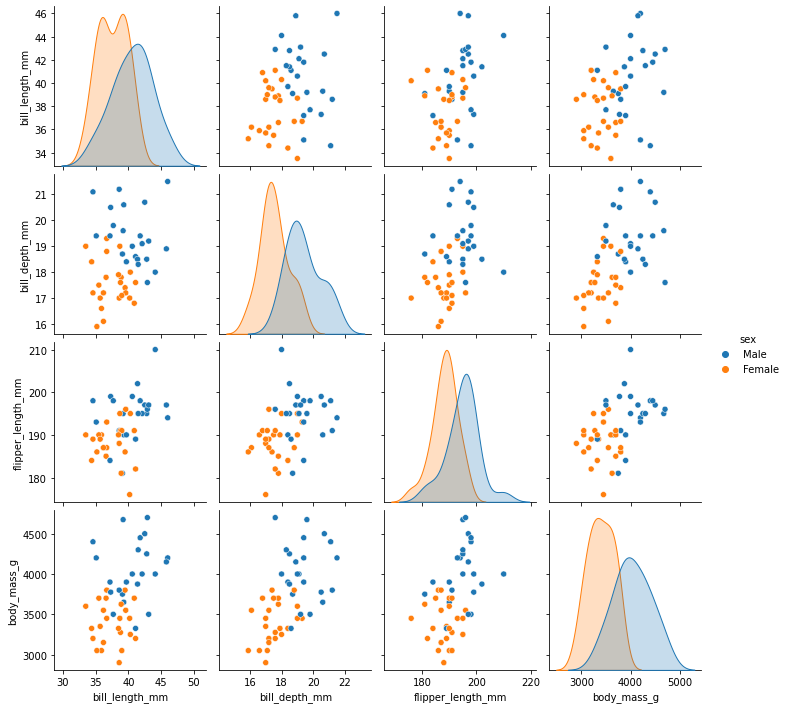

In [38]:
# Let's now see how well they differ by islands. To do this, choose which island you want to check
sns.pairplot(data = penguins_adelie[penguins_adelie.island == "Torgersen"], hue = "sex")

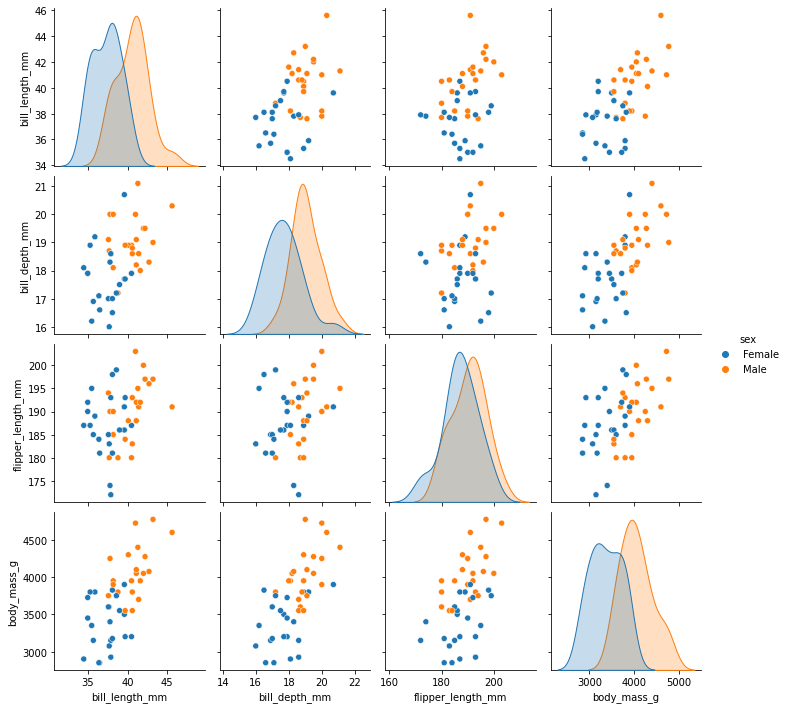

In [39]:
sns.pairplot(data = penguins_adelie[penguins_adelie.island == "Biscoe"], hue = "sex")

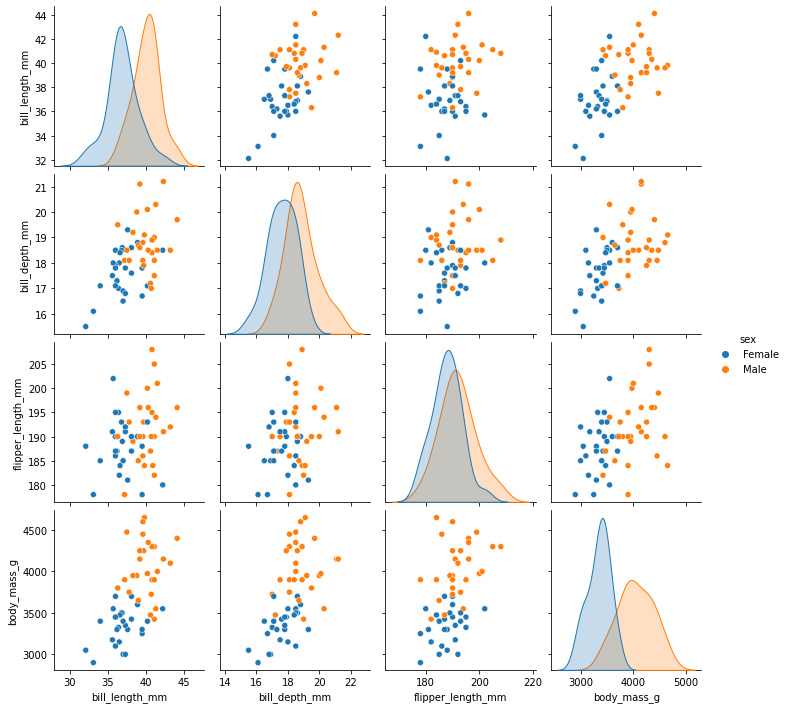

In [40]:
sns.pairplot(data = penguins_adelie[penguins_adelie.island == "Dream"], hue = "sex")

In the case of the island of **Torgersen**: although it cannot be assumed that all penguins will be easily identifiable, it seems that the separation between sex is more consistent, especially in those graphs in which the weight (*body_mass_g*) is involved.

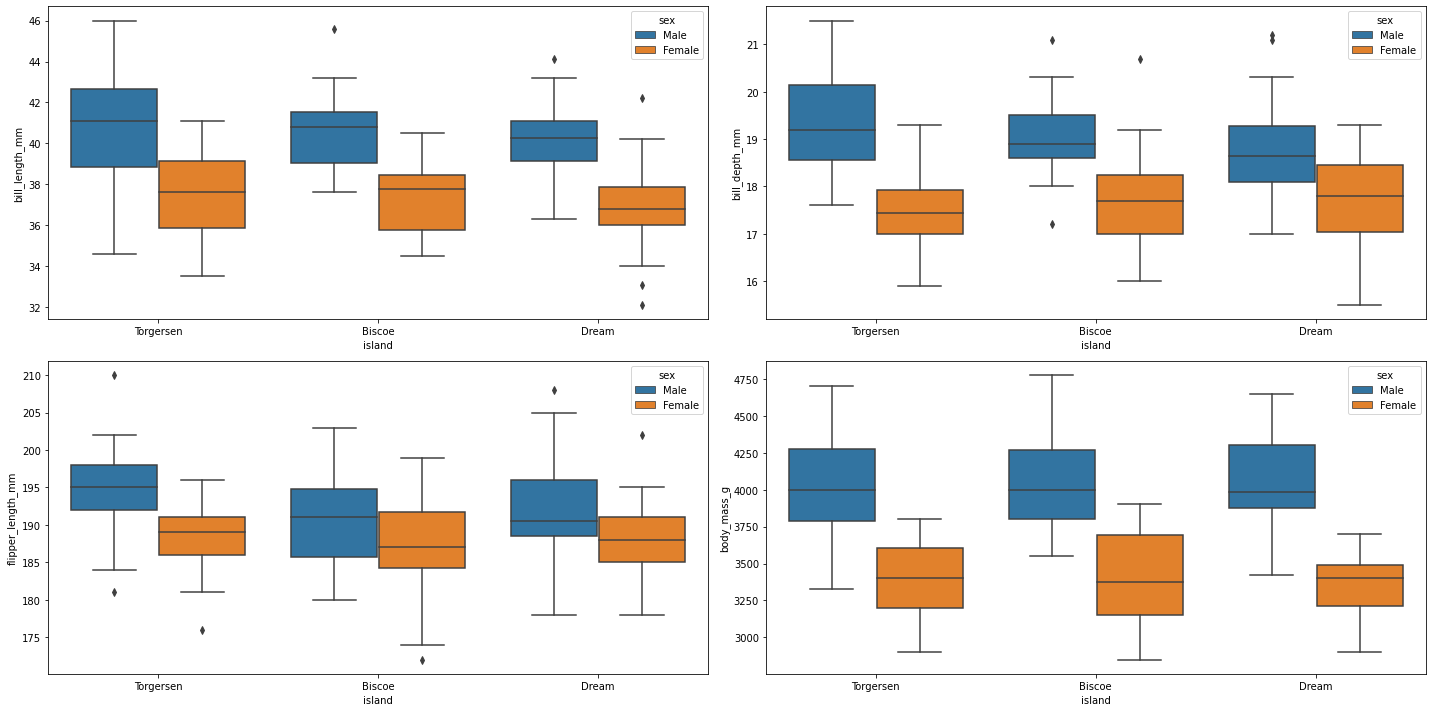

In [41]:
# We are going to visualize the boxplots by island and sex to evaluate if the variables are differentiable
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,2,figsize=(20,10))
sns.boxplot(data = penguins_adelie, x="island",y="bill_length_mm", hue = "sex", ax=axes[0, 0])
sns.boxplot(data = penguins_adelie, x="island",y="bill_depth_mm", hue = "sex", ax=axes[0, 1])
sns.boxplot(data = penguins_adelie, x="island",y="flipper_length_mm", hue = "sex", ax=axes[1, 0])
sns.boxplot(data = penguins_adelie, x="island",y="body_mass_g", hue = "sex", ax=axes[1, 1])
plt.tight_layout()

With this last visualization we can answer the initial questions. In most combinations, there are very few *outliers*, and while the variables have reasonable differences separated by sex/island, there are many regions that overlap with each other, with *flipper_length_mm* being on island * Biscoe* where it is more difficult to separate.

As a final step, we are going to make a small **correlation matrix** to numerically evaluate the linearity between the variables.

In [50]:
# Encoding the variables to numeric to use the function
coded_sex = [1 if value == "Male" else 0 for value in penguins_adelie.sex]
penguins_adelie_num = penguins_adelie.copy()


penguins_adelie_num.sex = coded_sex


In [51]:
# Another method (better for several categories)
penguins_adelie_num = penguins_adelie.copy()
penguins_adelie_num['sex'] = penguins_adelie['sex'].replace(['Female', 'Male'], [0, 1])

In [44]:
penguins_adelie_num['sex']

0      1
1      0
2      0
4      0
5      1
      ..
147    0
148    0
149    1
150    0
151    1
Name: sex, Length: 146, dtype: int64

<AxesSubplot:>

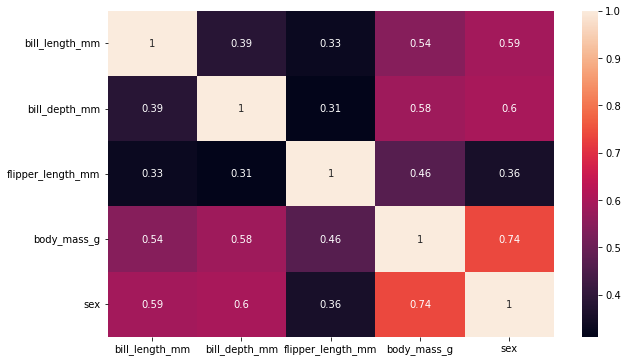

In [45]:
# Correlation between the dataset variables with the sex class encoded
plt.figure(figsize = (10, 6))
sns.heatmap(penguins_adelie_num.corr(), annot = True)

Finally, the correlation matrix provides us with information on the linearity of the variables. Since we want to identify if a penguin is male or female, we will look at the target variable: **sex**.

In the case of *body_mass_g* we see that it has a linear correlation of almost 0.75, which is considered high, just like *bill_length_mm* and *bill_depth_mm*, which are close to 0.6. Finally, *flipper_length_mm* has little correlation.

These values can be contrasted with the box plots (*boxplots*) made previously. In the case of *flipper_length_mm* it is observed how the ranges of values between penguins on island *Torgersen* overlap in most of the region.

With this brief visual analysis we can begin to have enough knowledge to apply clustering techniques for the specific case:
- We have visually verified the separability between the sex of the penguins working with the **granularity** of the data (depth)
- Also the linearity between the variables and the objective variable, being able to reduce the number of dimensions to be used.

# Exercise

Make a correlation matrix for the complete data set (penguins froms all islands) and try to ask:
* Is the island decisive when it comes to the physical development of penguins?
* Are we able to distinguish penguins from one island or another?
* Could we identify the species and island with physiological data?

Remember that all categorical attributes must be converted to numerical to consider them in the correlation matrix.

EXERCICI A CLASSE

<AxesSubplot:>

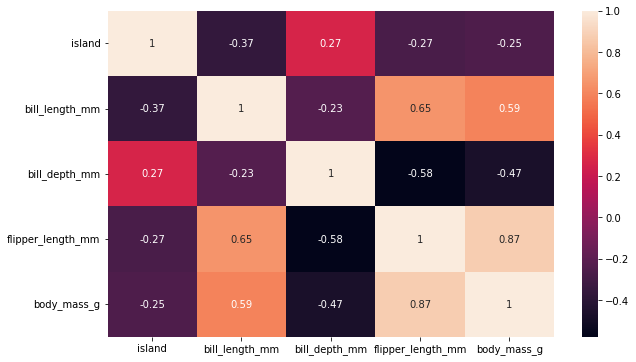

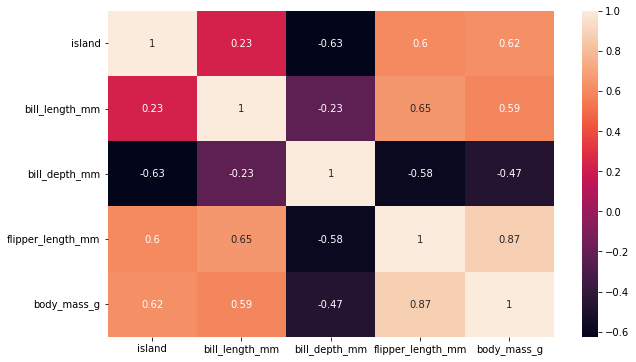

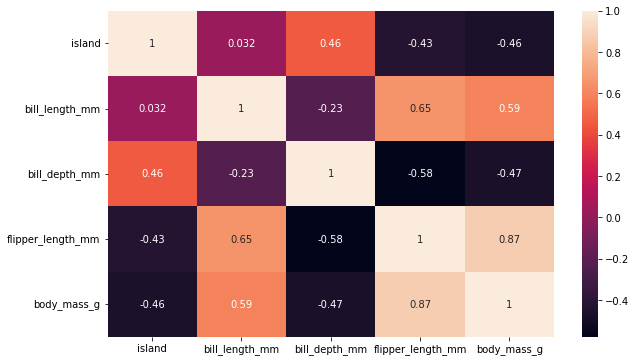

In [78]:
penguins_good = penguins.copy()
penguins_good_clean = penguins_good.dropna()



coded_island_1 = [1 if value == "Torgersen" else 0 for value in penguins_good_clean.island]
penguins_island_1 = penguins_clean.copy()

penguins_island_1.island = coded_island_1


plt.figure(figsize = (10, 6))
sns.heatmap(penguins_island_1.corr(), annot = True)



coded_island_2 = [1 if value == "Biscoe" else 0 for value in penguins_good_clean.island]
penguins_island_2 = penguins_clean.copy()


penguins_island_2.island = coded_island_2

plt.figure(figsize = (10, 6))
sns.heatmap(penguins_island_2.corr(), annot = True)


coded_island_3 = [1 if value == "Dream" else 0 for value in penguins_good_clean.island]
penguins_island_3 = penguins_clean.copy()


penguins_island_3.island = coded_island_3

plt.figure(figsize = (10, 6))
sns.heatmap(penguins_island_3.corr(), annot = True)


We can see that the island does not have an impact on the phisical development of the penguins because we can see in the different correlations the values aren't near the values -1 and 1, are always near the 0 and 0,5 (that means that there is no high correlativity between the attributes analized).

# Clustering
We will try to validate if we are able to identify sex of Adelie specie using the island and the physiological data.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

In [ ]:
penguins_adelie_num = penguins_adelie.copy()
penguins_adelie_num['island'] = penguins_adelie['island'].replace(['Biscoe', 'Dream', 'Torgersen'], [0, 1, 2])
penguins_adelie_num['species'] = penguins_adelie['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2])
penguins_adelie_num['sex'] = penguins_adelie['sex'].replace(['Female', 'Male'], [0, 1])

In [ ]:
kmeans = KMeans(2, init='k-means++')
original_sex = penguins_adelie_num.sex
penguins_no_sex = penguins_adelie_num.drop('sex', axis=1)
kmeans.fit(penguins_no_sex)
print(confusion_matrix(original_sex, kmeans.labels_))
#clusters identified will be in the x-axis (number of cluster can be different to class name)

In [ ]:
print("Accuracy is ", np.round(100*accuracy_score(original_sex, kmeans.labels_), 2), "%")

In [ ]:
#More visually
sns.heatmap(confusion_matrix(original_sex,kmeans.labels_),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

Using only the attribute most correlated with sex

In [ ]:
penguins_adelie_filt = penguins_adelie[['body_mass_g','sex']]
penguins_adelie_num = penguins_adelie_filt.copy()
penguins_adelie_num['sex'] = penguins_adelie_filt['sex'].replace(['Female', 'Male'], [0, 1])

In [ ]:
kmeans = KMeans(2, init='k-means++')
original_sex = penguins_adelie_num.sex
penguins_no_sex = penguins_adelie_num.drop('sex', axis=1)
kmeans.fit(penguins_no_sex)
print(confusion_matrix(original_sex, kmeans.labels_))
#clusters identified will be in the x-axis (number of cluster can be different to class name)

In [ ]:
print("Accuracy is ", np.round(100*accuracy_score(original_sex, kmeans.labels_), 2), "%")

In [ ]:
#More visually
sns.heatmap(confusion_matrix(original_sex,kmeans.labels_),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

There is no important difference in the results, so we can use only attribute *body_mass_g* to identify sex of Adelie penguins.

# Clustering exercise
We will try to answer objectively if we are able to identify the specie using the island and the physiological data.